<h1>1:Introduction</h1>

**About DonorsChoose:**\
DonorsChoose.org is a United States–based 501(c)(3) nonprofit organization that allows individuals to donate directly to public school classroom projects. Founded in 2000 by former public school teacher Charles Best, DonorsChoose.org was among the first civic crowdfunding platforms of its kind. The organization has been given Charity Navigator’s highest rating every year since 2005. In January 2018, they announced that 1 million projects had been funded. In 77% of public schools in the United States, at least one project has been requested on DonorsChoose.org. Schools from wealthy areas are more likely to make technology requests, while schools from less affluent areas are more likely to request basic supplies. It's been noted that repeat donors on DonorsChoose typically donate to projects they have no prior relationship with, and most often fund projects serving financially challenged students.

**Objective of this Blog:**\
In this blog I will be doing detailed Exploratory Data Analysis on DonorsChoose Dataset.

<h1>2:Retrieving the Data</h1>

**Importing Libraries:**

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import pickle
from tqdm import tqdm
import os
from collections import Counter

**Reading Data**

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

print("Number of data points in Train Data: ", project_data.shape)
print('-'*50)
print("Number of data points in Resource Data: ", resource_data.shape)

Number of data points in Train Data:  (109248, 17)
--------------------------------------------------
Number of data points in Resource Data:  (1541272, 4)


<h1>3:Glimpse of Data</h1>

In [3]:
project_data.head(5)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [4]:
resource_data.head(5)

,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95
2,p069063,Cory Stories: A Kid's Book About Living With Adhd,1,8.45
3,p069063,"Dixon Ticonderoga Wood-Cased #2 HB Pencils, Bo...",2,13.59
4,p069063,EDUCATIONAL INSIGHTS FLUORESCENT LIGHT FILTERS...,3,24.95


In [5]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109248 entries, 0 to 109247
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Unnamed: 0                                    109248 non-null  int64 
 1   id                                            109248 non-null  object
 2   teacher_id                                    109248 non-null  object
 3   teacher_prefix                                109245 non-null  object
 4   school_state                                  109248 non-null  object
 5   project_submitted_datetime                    109248 non-null  object
 6   project_grade_category                        109248 non-null  object
 7   project_subject_categories                    109248 non-null  object
 8   project_subject_subcategories                 109248 non-null  object
 9   project_title                                 109248 non-nu

<h1>4:Data preparation</h1>

**Checking for Null Values:**

In [6]:
print(project_data.isnull().sum())

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64


**Observation**\
In training data, we can see that 'project_essay_4' and 'project_essay_3' having many null values. So during the training of models it's better to remove these 2 columns.

In [7]:
print(resource_data.isnull().sum())

id               0
description    292
quantity         0
price            0
dtype: int64


**Observation:**\
Only 292 data points are missing in 'description' column. These can be taken care by removing the rows because it's very less as compared to original data points.    

<h1>5:Data Exploration</h1>

**Project proposal is Approved or not ?**

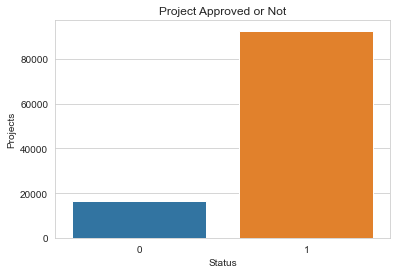

In [31]:
sns.set_style("whitegrid")
sns.countplot(x='project_is_approved' , data=project_data)
plt.title('Project Approved or Not')
plt.xlabel('Status')
plt.ylabel('Projects')
plt.show()
# Here '0' indicates 'Project Not Approved' and '1' indicates 'Project Approved'

**Observation:**\
Approx more than 85% of the projects submitted are approved and approx less than 15% are not approved. This indicates that the training data is highly imbalanced.      

**Univariate Analysis: School State**

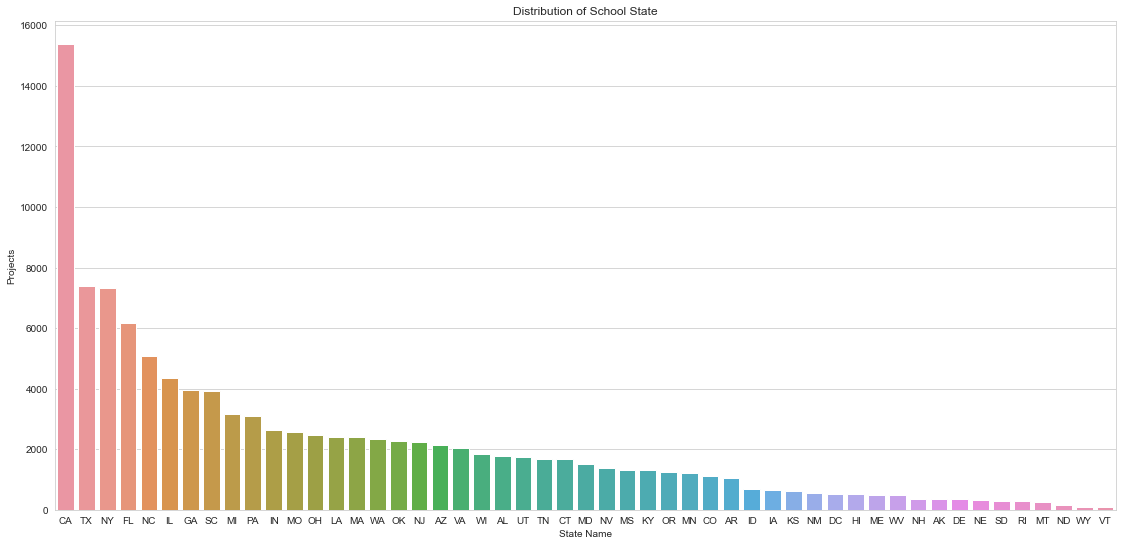

In [9]:
school_state = project_data['school_state'].value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(19,9))
sns.barplot(school_state.index, school_state.values, ax=ax)
ax.set(xlabel= 'State Name', ylabel = 'Projects', title = "Distribution of School State")
plt.show()

**Observation:**\
Among all the states, California(CA) has the highest number of projects proposals followed by Texas(TX) and Tennessee(NY).    

**Univariate Analysis: Project Grade Category**

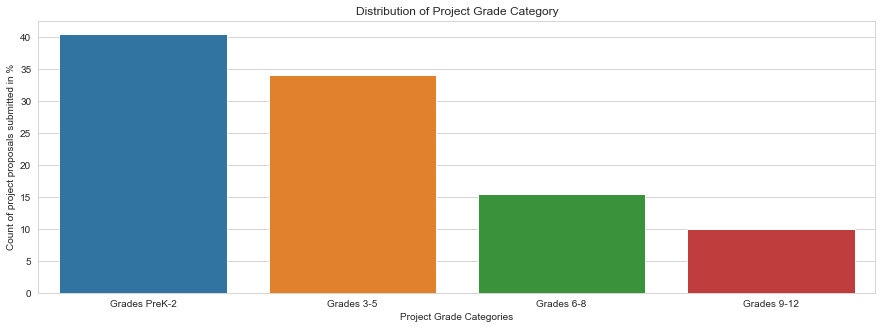

In [10]:
project_grade_category = project_data['project_grade_category'].value_counts().head(7)
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x =project_grade_category.index, y = (project_grade_category/project_grade_category.sum())*100, ax=ax)
ax.set(xlabel= 'Project Grade Categories', ylabel = 'Count of project proposals submitted in %', 
       title = "Distribution of Project Grade Category")
plt.show()

**Observation:**\
The project grade category 'Grades Prel-2' has the highest number of projects proposals of approx. 41% followed by 'Grades 3-5' which is approx. 34% and 'Grades 6-8' has approx. 16%   

**Univariate Analysis: Project Subject Category**

In [11]:
#Since the project_subject_categories is textual data, in order to perform analysis we need to do text preprocessing as follows:

catogories = list(project_data['project_subject_categories'].values)
catogories_list = []
for i in catogories:
    temp = ""
    for j in i.split(','): 
        if 'The' in j.split(): 
            j=j.replace('The','') 
        j = j.replace(' ','') 
        temp+=j.strip()+" " 
        temp = temp.replace('&','_')
    catogories_list.append(temp.strip())
    
project_data['clean_categories'] = catogories_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)
project_data.head(2)    

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports


Total number of project subject categories :  51


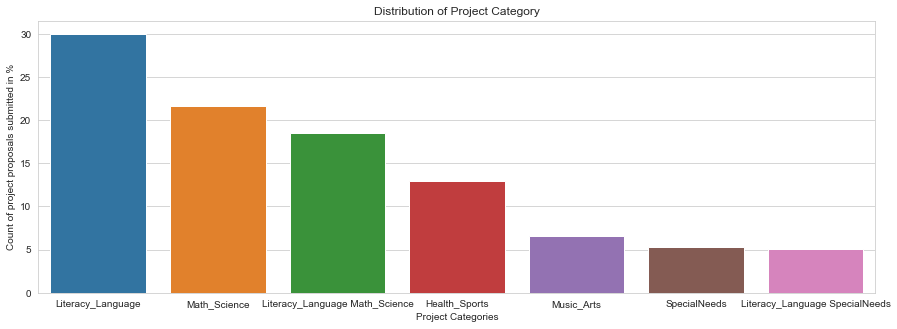

In [12]:
print("Total number of project subject categories : ", len(project_data["clean_categories"].value_counts()))
categories = project_data['clean_categories'].value_counts().head(7)
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = categories.index, y = (categories/categories.sum())*100, ax=ax)
ax.set(xlabel= 'Project Categories', ylabel = 'Count of project proposals submitted in %', 
       title = "Distribution of Project Category")
plt.show()

**Observation:**\
Out of 51 Project categories, Project proposals submission for project category 'Literacy & Language' is highest which is approx. 30 % followed by Math & Science which has approx. 23 %.

**Univariate Analysis: project_subject_subcategories**

In [13]:
#Since the project_subject_subcategories is textual data, in order to perform analysis we need to do text preprocessing as follows:

sub_catogories = list(project_data['project_subject_subcategories'].values)
sub_cat_list = []
for i in sub_catogories:
    temp = ""
    for j in i.split(','): 
        if 'The' in j.split(): 
            j=j.replace('The','') 
        j = j.replace(' ','') 
        temp+=j.strip()+" " 
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())
    
project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports


Total sub-categories of the projects :  109248


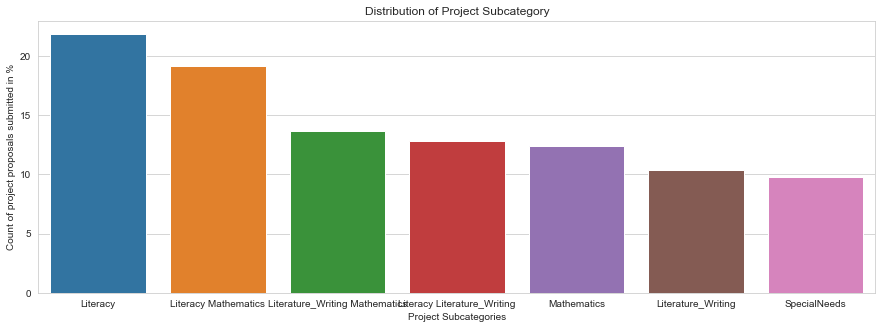

In [14]:
print("Total sub-categories of the projects : ",len(project_data["clean_subcategories"]))
sub_categories = project_data['clean_subcategories'].value_counts().head(7)
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = sub_categories.index, y = (sub_categories/sub_categories.sum())*100, ax=ax)
ax.set(xlabel= 'Project Subcategories', ylabel = 'Count of project proposals submitted in %', 
       title = "Distribution of Project Subcategory")
plt.show()

**Observation:**\
Out of 1,09,248 Project subcategories, Project proposals submission for project sub-categoriesis 'Literacy' is highest which is approx 28% followed by 'Literacy Mathematics' which is approx 19%.    

**Univariate Analysis:Project titles**

Total project titles are :  109248


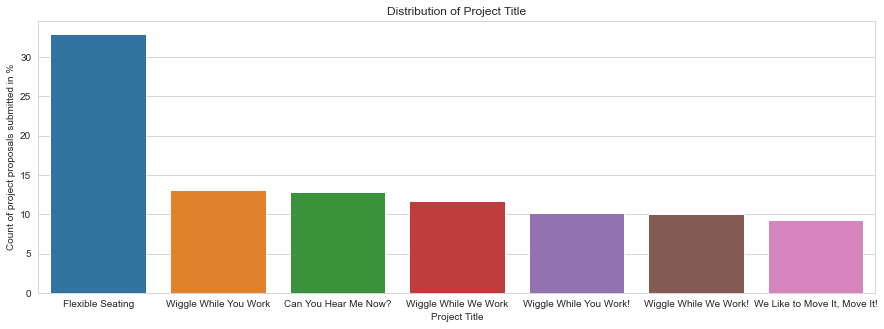

In [15]:
print("Total project titles are : ", len(project_data["project_title"]))
project_titles = project_data['project_title'].value_counts().head(7)
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = project_titles.index, y = (project_titles/project_titles.sum())*100, ax=ax)
ax.set(xlabel= 'Project Title', ylabel = 'Count of project proposals submitted in %', title = "Distribution of Project Title")
plt.show()

**Observation:**\
Out of total 1,09,248 project titles, the project title with 'Flexible Seating' has highest proposals submission of approx 37%. 

**Univariate Analysis:Teacher Prefix**

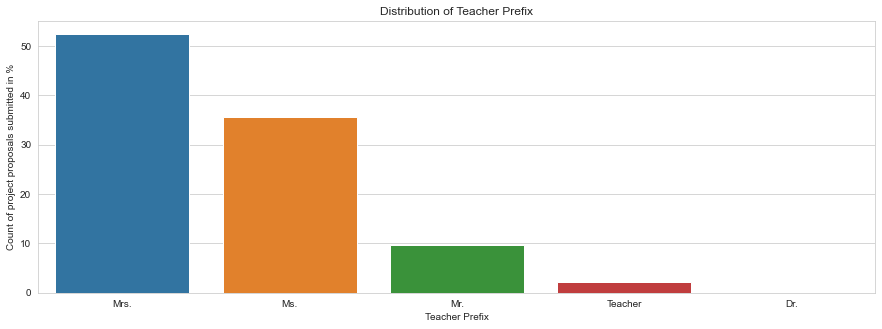

In [16]:
teacher_prefix = project_data['teacher_prefix'].value_counts()
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = teacher_prefix.index, y = (teacher_prefix/teacher_prefix.sum())*100, ax=ax)
ax.set(xlabel= 'Teacher Prefix', ylabel = 'Count of project proposals submitted in %', title = "Distribution of Teacher Prefix")
plt.show()

**Observation:**\
The project proposal submitted by married womens is highest which is approx 53 % followed by unmarried womens which has approx 37 %.
Project proposal submitted by Teacher which is approx. 2 % is vey low as compared to Mrs., Ms., Mr.    

In [22]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

replace_by_space = re.compile('[/(){}\[\]\|@,;]')
symbols = re.compile('[^0-9a-z #+_]')
stopword = set(stopwords.words('english'))
def text_prepare(text):
    text = text.lower() 
    text = replace_by_space .sub(' ',text)   
    text = symbols.sub('',text)    
    temp = [s.strip() for s in text.split() if s not in stopword ]
    new_text = ''
    for i in temp:
        new_text +=i+' '
    text = new_text
    return text.strip()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vivek\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


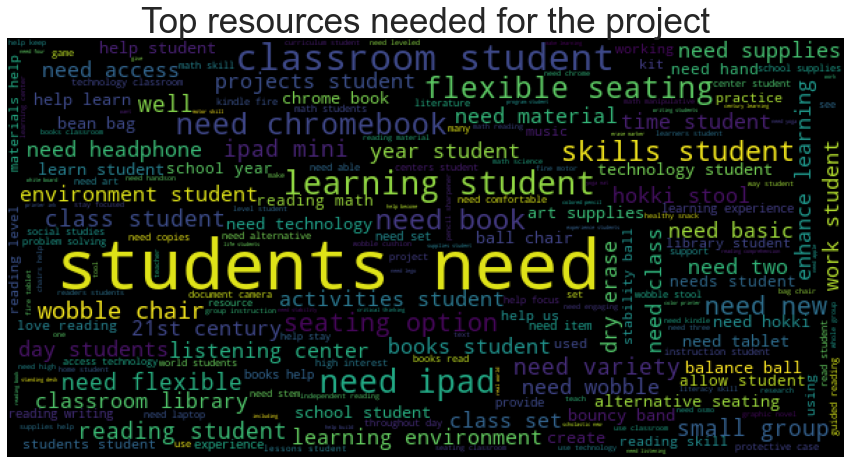

In [23]:
temp_data = project_data.dropna(subset=['project_resource_summary'])
# converting into lowercase
project_data['project_resource_summary'] = project_data['project_resource_summary'].apply(lambda x: " ".join(x.lower() 
                                                                                                            for x in x.split()))
project_data['project_resource_summary'] = project_data['project_resource_summary'].map(text_prepare)


from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size=50,width=600,height=300).generate(' '.join(project_data['project_resource_summary'].values))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Top resources needed for the project", fontsize=35)
plt.axis("off")
plt.show() 

**Creating utility functions for further analyses**

In [17]:
def stack_plot(data, xtick, col2='project_is_approved', col3='total'):
    ind = np.arange(data.shape[0])
    
    plt.figure(figsize=(20,5))
    p1 = plt.bar(ind, data[col3].values)
    p2 = plt.bar(ind, data[col2].values)

    plt.ylabel('Projects')
    plt.title('% of projects aproved state wise')
    plt.xticks(ind, list(data[xtick].values))
    plt.legend((p1[0], p2[0]), ('total', 'accepted'))
    plt.show()

In [18]:
def univariate_barplots(data, col1, col2='project_is_approved', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(project_data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(project_data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
        temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    #print(temp.head(5))
    #print("="*50)
    #print(temp.tail(5))

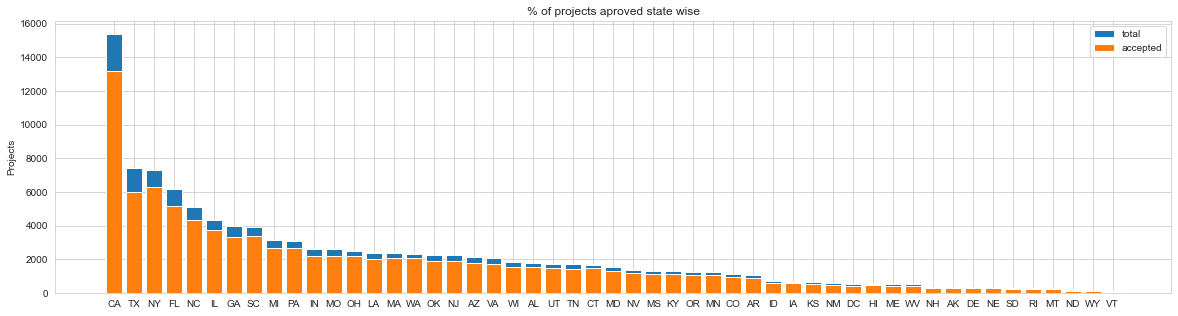

In [24]:
univariate_barplots(project_data, 'school_state', 'project_is_approved', False)

**Observation:**\
Among all States, California(CA) has both highest project proposals with highest acceptance rate.NewYork(NY) is the second highest State with acceptance rate.

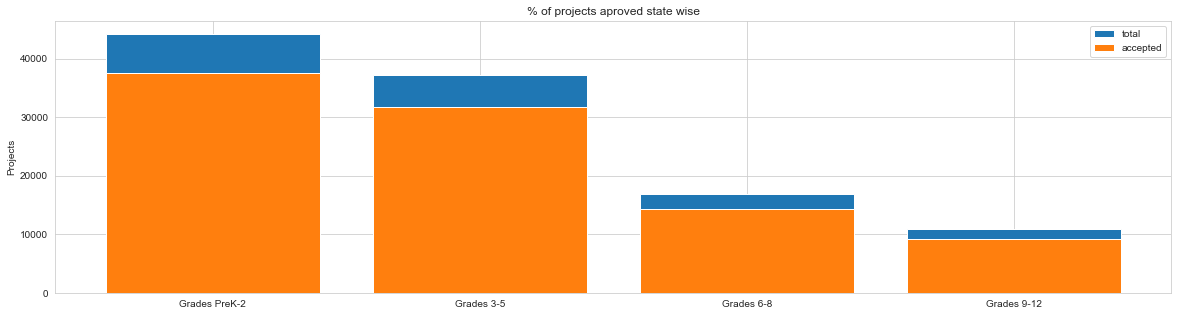

In [25]:
univariate_barplots(project_data, 'project_grade_category', 'project_is_approved', top=False)

**Observation:**\
Among all Project Grade Category, Grades PreK-2 has both highest project proposals with highest acceptance rate followed by Grades 3-5.

**Project Proposals Time Analysis**

In [26]:
project_data["project_submitted_datetime"] = pd.to_datetime(project_data["project_submitted_datetime"])
project_data["donation_received_year"] = project_data["project_submitted_datetime"].dt.year
project_data["donation_received_month"] = project_data["project_submitted_datetime"].dt.month


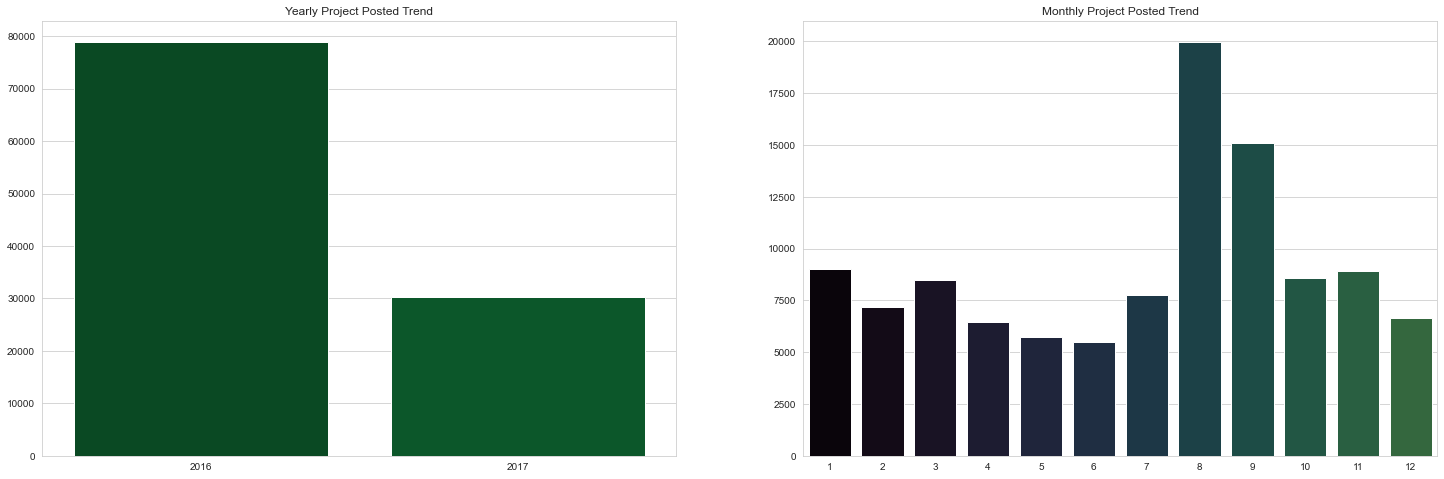

In [27]:
f,ax=plt.subplots(1,2,figsize=(25,8))
sns.barplot(ax=ax[0],
            x=project_data["project_submitted_datetime"].dt.year.value_counts().index,
            y=project_data["project_submitted_datetime"].dt.year.value_counts().values,
            palette=sns.color_palette('BuGn_r',20))
ax[0].set_title('Yearly Project Posted Trend')
sns.barplot(ax=ax[1],
            x=project_data["project_submitted_datetime"].dt.month.value_counts().index,
            y=project_data["project_submitted_datetime"].dt.month.value_counts().values,
            palette=sns.color_palette("cubehelix", 35))
ax[1].set_title('Monthly Project Posted Trend')
plt.show()

**Observation:**\
In the year 2016,the number of project proposals is maximum. Also in the months of August and September, the project proposals are maximum.

In [28]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')

approved_price = project_data[project_data['project_is_approved']==1]['price'].values

rejected_price = project_data[project_data['project_is_approved']==0]['price'].values

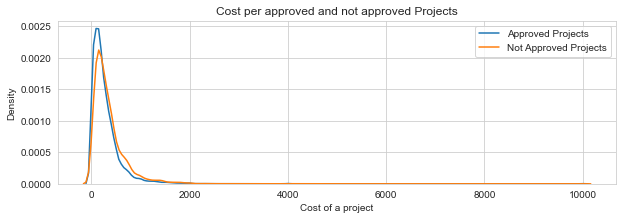

In [29]:
plt.figure(figsize=(10,3))
sns.distplot(approved_price, hist=False, label="Approved Projects")
sns.distplot(rejected_price, hist=False, label="Not Approved Projects")
plt.title('Cost per approved and not approved Projects')
plt.xlabel('Cost of a project')
plt.legend()
plt.show()

<h1>Conclusion</h1>

1)Training data is highly imbalanced that is approx. 85 % projetcs were approved and 15 % project were not approved. Majority imbalanced class is positive.

2)Out of 50 states, California(CA) having higher number of projects proposal submitted approx. 14 % followed by Texas(TX)(7 %) and Tennessee(NY)(7 %).

3)Out of 4 school grade levels, Project proposals submission in school grade levels is higher for Grades Prek-2 which is approximately 41 % followed by Grades 3-5 which has approx. 34 %.

4)Out of 51 Project categories, Project proposals submission for project categories is higher for 'Literacy & Language' which is approx. 30 % followed by 'Math & Science' which has approx. 23 %.

5)Out of 1,09,248 Project subcategories, Project proposals submission for project sub-categoriesis is higher for 'Literacy' which is approx. 28 % followed by 'Literacy & Mathematics' which has approx. 19 % .

6)Out of 1,09,248 project titles, Project proposals submission for project titles is higher for 'Flexible seating' which is approx. 37 % .

7)Most of the cost for project is between 0 to 2k dollar.